               G2          G3
count  395.000000  395.000000
mean    10.713924   10.415190
std      3.761505    4.581443
min      0.000000    0.000000
25%      9.000000    8.000000
50%     11.000000   11.000000
75%     13.000000   14.000000
max     19.000000   20.000000
Shape of X: (395,)
Shape of Y: (395,)
   G2  G3
0   6   6
1   5   6
2   8  10
3  14  15
4  10  10
Coefficient (m): 1.1021123562440605
Intercept (c): -1.3927582066452242
Mean Squared Error: 3.793981314444265
Root Mean Squared Error: 1.9478144969283562


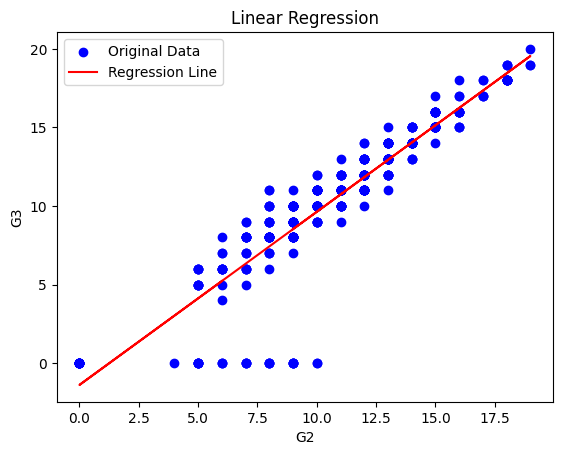

G2: 10 -> Predicted G3: 9.62836535579538
G2: 12 -> Predicted G3: 11.832590068283501
G2: 15 -> Predicted G3: 15.138927137015683
G2: 18 -> Predicted G3: 18.44526420574786


In [ ]:
import pandas as pd
df=pd.read_csv('student-mat.csv',sep=";")

# Step 3: Now you can proceed with the rest of the steps
XY = df[['G2', 'G3']]
print(XY.describe())

# Divide XY into X and Y
X = XY['G2']
Y = XY['G3']
# Print the shapes of X and Y
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")
# Print some rows from XY
print(XY.head())
def calculate_coefficients(X, Y):
    n = len(X)
    mean_X, mean_Y = X.mean(), Y.mean()

    numerator = sum((X - mean_X) * (Y - mean_Y))
    denominator = sum((X - mean_X) ** 2)

    m = numerator / denominator
    c = mean_Y - (m * mean_X)

    return m, c

# Calculate coefficients
m, c = calculate_coefficients(X, Y)
print(f"Coefficient (m): {m}")
print(f"Intercept (c): {c}")
def predict(X, m, c):
    return m * X + c

# Predict Y
Y_predicted = predict(X, m, c)

def mean_squared_error(Y, Y_predicted):
    mse = sum((Y - Y_predicted) ** 2) / len(Y)
    return mse

# Calculate MSE
mse = mean_squared_error(Y, Y_predicted)
print(f"Mean Squared Error: {mse}")

def root_mean_squared_error(Y, Y_predicted):
    mse = mean_squared_error(Y, Y_predicted)
    rmse = mse ** 0.5
    return rmse

# Calculate RMSE
rmse = root_mean_squared_error(Y, Y_predicted)
print(f"Root Mean Squared Error: {rmse}")

import matplotlib.pyplot as plt

# Plot the original data points
plt.scatter(X, Y, color='blue', label='Original Data')

# Plot the regression line
plt.plot(X, Y_predicted, color='red', label='Regression Line')

plt.xlabel('G2')
plt.ylabel('G3')
plt.title('Linear Regression')
plt.legend()
plt.show()
# Predicting G3 for some random G2 values
random_G2_values = [10, 12, 15, 18]
predicted_G3_values = predict(pd.Series(random_G2_values), m, c)

for g2, g3 in zip(random_G2_values, predicted_G3_values):
    print(f"G2: {g2} -> Predicted G3: {g3}")